# WINE QUALITY PREDICTION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Users\\shash\\OneDrive\\Desktop\\Python Projects\\Wine Quuality Prediction\\WineQT.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [7]:
# Gives the transpose of the describe() method
# Transposes index & columns of the table
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


<b>If there were any missing data:
    
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            df[col] = df[col].fillna(df[col].mean()]
        

In [8]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mean())

In [9]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

# Exploratory Data Analysis

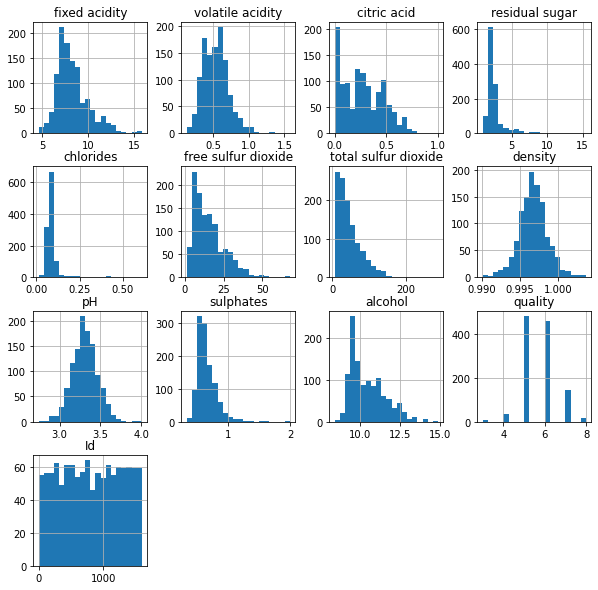

In [10]:
df.hist(bins=20, figsize=(10,10))
plt.show()

In [11]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

<BarContainer object of 1143 artists>

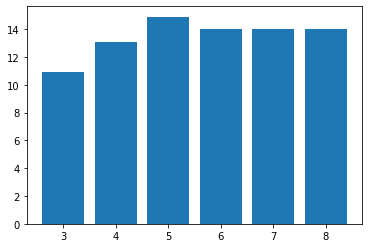

In [12]:
# To visualise number data of each quality of wine
plt.bar(df['quality'], df['alcohol'])

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

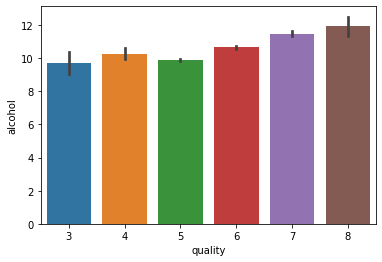

In [13]:
# Quality v/s alcohol
sns.barplot(data=df, x='quality', y='alcohol')

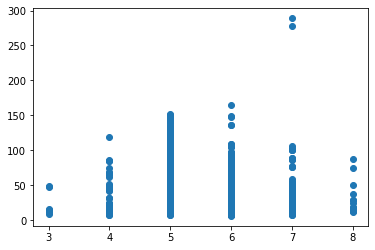

In [14]:
plt.scatter(df['quality'], df['total sulfur dioxide'])

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

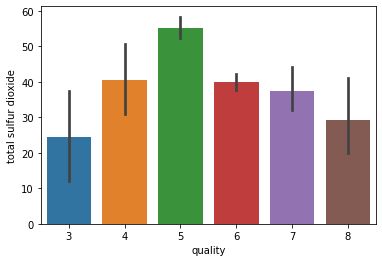

In [15]:
sns.barplot(data=df, x=df['quality'], y=df['total sulfur dioxide'])

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

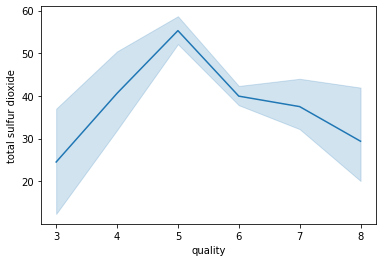

In [16]:
sns.lineplot(data=df, x=df['quality'], y=df['total sulfur dioxide'])

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

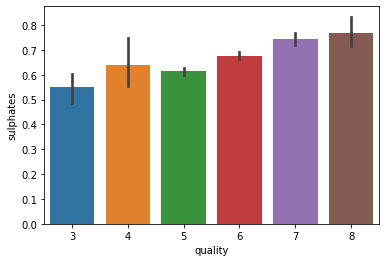

In [17]:
# Quality v/s sulphates
sns.barplot(data=df, x='quality', y='sulphates')

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

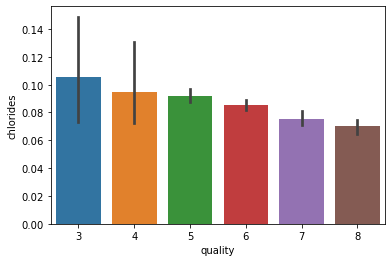

In [18]:
# Quality v/s chlorides
sns.barplot(data=df, x='quality', y='chlorides')

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

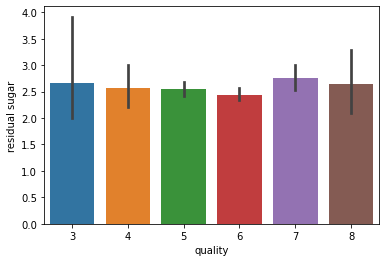

In [19]:
# Quality v/s chlorides
sns.barplot(data=df, x='quality', y='residual sugar')

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

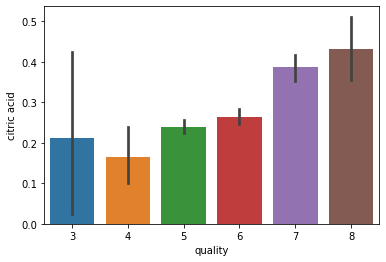

In [20]:
# Quality v/s citric acid
sns.barplot(data=df, x='quality', y='citric acid')

<AxesSubplot:xlabel='quality', ylabel='pH'>

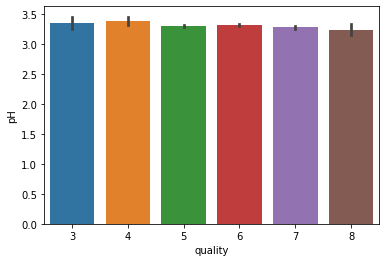

In [21]:
# Quality v/s pH value
sns.barplot(data=df, x='quality', y='pH')

In [22]:
# Alcohols having quality > 7.5
df[df['quality'] > 7.5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
190,7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.99730,3.35,0.86,12.8,8,267
197,10.3,0.32,0.45,6.4,0.073,5.0,13.0,0.99760,3.23,0.82,12.6,8,278
271,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,8,390
310,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.99870,2.88,0.82,9.8,8,440
321,11.3,0.62,0.67,5.2,0.086,6.0,19.0,0.99880,3.22,0.69,13.4,8,455
340,9.4,0.30,0.56,2.8,0.080,6.0,17.0,0.99640,3.15,0.92,11.7,8,481
349,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8,495
352,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8,498
419,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,588
747,9.1,0.40,0.50,1.8,0.071,7.0,16.0,0.99462,3.21,0.69,12.5,8,1061


In [23]:
# Id of alcohols having quality > 7.5
df[df['quality'] > 7.5]['Id']

190      267
197      278
271      390
310      440
321      455
340      481
349      495
352      498
419      588
747     1061
769     1090
793     1120
850     1202
996     1403
1030    1449
1104    1549
Name: Id, dtype: int64

<AxesSubplot:>

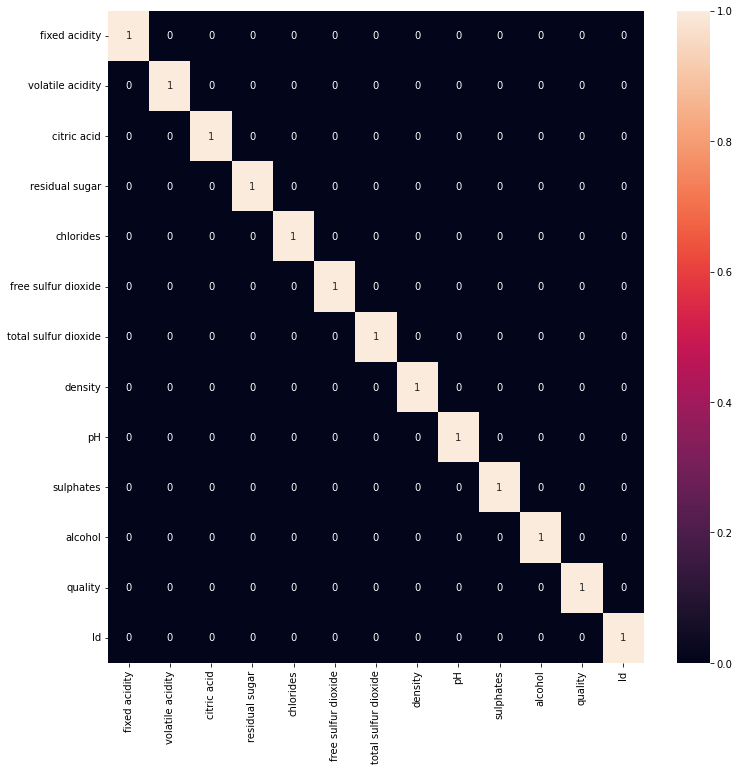

In [24]:
# Heatmap to remove redundant features

plt.figure(figsize=(12,12))
sns.heatmap(df.corr() > 0.7, annot=True, )

# MODEL DEVELOPMENT
Let’s prepare our data for training and splitting it into training and validation data so, that we can select which model’s performance is best as per the use case. We will train some of the state of the art machine learning classification models and then select best out of them using validation data.

In [25]:
df['best quality'] = [1 if x >= 6 else 0 for x in df.quality]

In [26]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,best quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4,0


# Normalizing the data

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

In [29]:
scaler.fit(df.drop(['quality', 'best quality'], axis=1))

StandardScaler()

In [30]:
scaled_features = scaler.transform(df.drop(['quality', 'best quality'], axis=1))

In [31]:
scaled_features

array([[-0.52157961,  0.93933222, -1.36502663, ..., -0.57365783,
        -0.96338181, -1.73561799],
       [-0.29259344,  1.94181282, -1.36502663, ...,  0.1308811 ,
        -0.59360107, -1.73346186],
       [-0.29259344,  1.27349242, -1.16156762, ..., -0.04525363,
        -0.59360107, -1.73130573],
       ...,
       [-1.20853813,  0.38239855, -0.9581086 , ..., -0.45623467,
         0.05351522,  1.70125196],
       [-1.38027776,  0.10393172, -0.8563791 , ...,  0.60057372,
         0.70063152,  1.70340809],
       [-1.38027776,  0.6330187 , -0.75464959, ...,  0.30701583,
        -0.22382033,  1.70772035]])

In [32]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-2])

In [33]:
df_feat.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382,-1.735618
1,-0.292593,1.941813,-1.365027,0.050060,0.234247,0.915920,0.643477,0.036165,-0.708928,0.130881,-0.593601,-1.733462
2,-0.292593,1.273492,-1.161568,-0.171289,0.107253,-0.060071,0.246745,0.140103,-0.325775,-0.045254,-0.593601,-1.731306
3,1.653789,-1.399789,1.483400,-0.466421,-0.252560,0.135127,0.429852,0.659792,-0.964363,-0.456235,-0.593601,-1.729150
4,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382,-1.726993


## Train, Test and Split

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
features = df_feat.drop(['quality'], axis=1)
target = df['best quality']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3)

In [37]:
print(X_train.shape)
print(X_test.shape)

(800, 11)
(343, 11)


# REGRESSION MODEL

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
model = LogisticRegression()

In [40]:
model.fit(X_train, y_train)

LogisticRegression()

In [41]:
prediction_log = model.predict(X_test)

In [42]:
# Classification report for LOGISTIC REGRESSION
print(classification_report(y_test, prediction_log))

              precision    recall  f1-score   support

           0       0.70      0.77      0.73       135
           1       0.84      0.78      0.81       208

    accuracy                           0.78       343
   macro avg       0.77      0.78      0.77       343
weighted avg       0.78      0.78      0.78       343



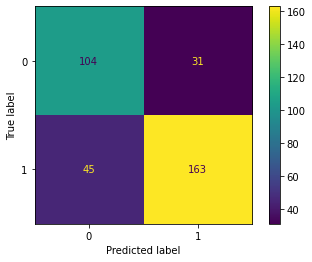

In [43]:
# Confusion MAtrix
conf_mat = confusion_matrix(y_test, prediction_log)
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
cm_display.plot()

# SUPPORT VECTOR MACHINE MODEL

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [45]:
# Performing Grid Search for 'C' and 'gamma value'
param_grid = {'C':[0.1, 1, 10, 100, 1000], 'gamma':[1, 0.1, 0.01, 0.001, 0.0001, 10]}

In [46]:
grid = GridSearchCV(SVC(), param_grid, verbose=3)

In [47]:
grid

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 10]},
             verbose=3)

In [48]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.519 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.519 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.519 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.512 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.512 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.744 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.700 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.731 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.750 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.750 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.725 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 10]},
             verbose=3)

In [49]:
# Getting the best parameters
grid.best_params_

{'C': 1, 'gamma': 0.1}

In [50]:
grid.best_score_

0.7449999999999999

In [51]:
model_svm = SVC(C=100, gamma=0.01)

In [52]:
model_svm.fit(X_train, y_train)

SVC(C=100, gamma=0.01)

In [53]:
prediction_svm = model_svm.predict(X_test)

In [54]:
# Classification report for SVM
print(classification_report(y_test, prediction_svm))

              precision    recall  f1-score   support

           0       0.69      0.81      0.75       135
           1       0.86      0.76      0.81       208

    accuracy                           0.78       343
   macro avg       0.78      0.79      0.78       343
weighted avg       0.79      0.78      0.78       343



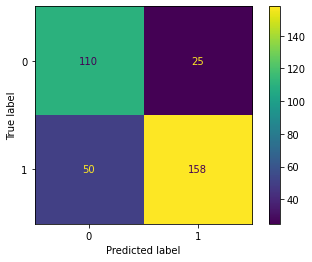

In [55]:
# Congusion matrix for SVM
conf_mat = confusion_matrix(y_test, prediction_svm)
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
cm_display.plot()

# K NEAREST NEIGHBOUR

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
# Choosing the best K value
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

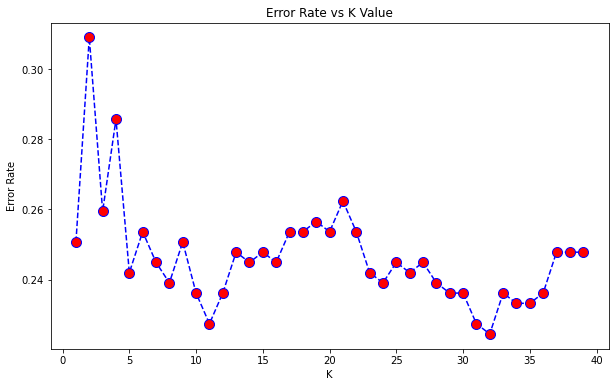

In [58]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', ls='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that for k = 30, error rate is minimum.


In [64]:
model_knn = KNeighborsClassifier(n_neighbors=11)

In [65]:
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [66]:
prediction_knn = model_knn.predict(X_test)

In [67]:
# Classification report for KNN
print(classification_report(y_test, prediction_knn))

              precision    recall  f1-score   support

           0       0.68      0.80      0.73       135
           1       0.85      0.75      0.80       208

    accuracy                           0.77       343
   macro avg       0.77      0.78      0.77       343
weighted avg       0.78      0.77      0.77       343



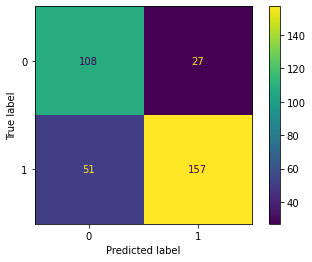

In [68]:
# Congusion matrix for SVM
conf_mat = confusion_matrix(y_test, prediction_knn)
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
cm_display.plot()

**So from above 3 classifiactions,  we can see that Support Vector Machine with C=100 and gamma=0.001 performa the best.**